# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises </span>
Luca Maria Colombo Gomez - Matr: 934049

### Exercise 01.1
- Test the Pseudo-Random Number generator downloaded from the NSL Ariel web site by estimating:

 $$\langle r \rangle = \int_0^1 r dr = 1/2$$

 $$\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$$

The estimate has been done using blocking method, with 100 blocks of 1000 throws each

In [5]:
# Include libs
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

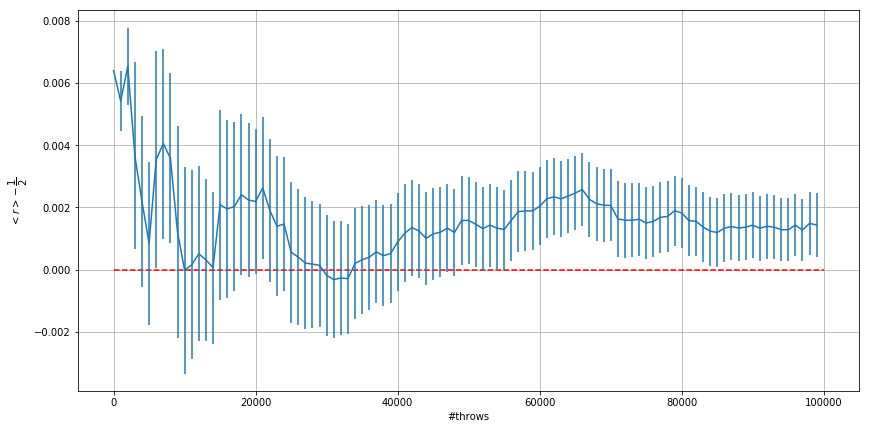

In [6]:
# Read data
x1, y1, err_prog1 = np.loadtxt("1.1/data/r.dat", usecols=(0,1,2), delimiter=' ', unpack='true')

# Set plot size
plt.figure(figsize=(14,7))

# Plot horizontal line at y, from xmin to xmax
plt.hlines(0, 0, 100000, colors='r', linestyles='dashed')
# draw data plot with error bars
plt.errorbar(x1,y1,yerr=err_prog1)
plt.xlabel('#throws')
plt.ylabel('$<r>-\\dfrac{1}{2}$')
plt.grid(True)
plt.show()


In [7]:
x2, y2, err_prog2 = np.loadtxt("1.1/data/s.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.figure(figsize=(14,7))
plt.errorbar(x2,y2,yerr=err_prog2)
plt.hlines(0, 0, 100000, colors='r', linestyles='dashed')
plt.xlabel('#throws')
plt.ylabel('$\\sigma^2-\\dfrac{1}{12}$')
plt.grid(True)
plt.show()

OSError: 1.1/s.dat not found.

The blocking method applied to the data shows result compatibles with the Central Limit theorem, with a discrepance $\sim 1 \sigma$

Divide $[0,1]$ into $M$ identical sub-intervals and implement the $\chi^2$ test.

I used M=100 and the $\chi^2$ value has been calculated for each single block (blue line) and cumulatively.

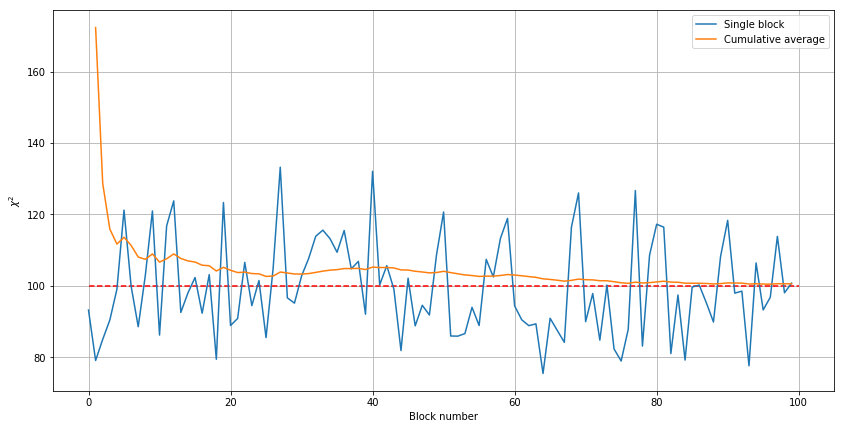

In [8]:
x, y = np.loadtxt("1.1/data/chi.dat",usecols=(0,1), delimiter=' ', unpack='true')
xs, ys = np.loadtxt("1.1/data/chi_avg.dat",usecols=(0,1), delimiter=' ', unpack='true')
plt.figure(figsize=(14,7))
plt.plot(x,y, label = 'Single block')
plt.plot(xs,ys, label = 'Cumulative average')
plt.legend()
plt.hlines(100, 0, 100, colors='r', linestyles='dashed')
plt.xlabel('Block number')
plt.ylabel('$\chi^2$')
plt.grid(True)
plt.show()

The orange plot shows the value of $\chi^2$ calculated with the cumulative data from all the blocks until **block number**, and it converge to 100.

The hypotesis that the random numbers are drawn from a uniform distribution can be confirmed

### Exercise 01.2
- Extend Pseudo-Random Number generator downloaded from the NSL Ariel web site and check the Central Limit Theorem:

 <font color="black">1. Add two probability distributions by using the method of the inversion of the cumulative distribution to sample from a generic exponential distribution, and a generic Cauchy-Lorentz distribution.
<font color="black">2. Make 3 pictures</font> with the histograms obtained filling them with $10^4$ realizations of $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ (for $N=1, 2, 10, 100$), being $x_i$ a random variable sampled throwing a *standard* dice (fig.1), an *exponential* dice (fig.2, use $\lambda=1$) and a *Lorentzian* dice (fig.3, use $\mu=0$ and $\Gamma=1$).

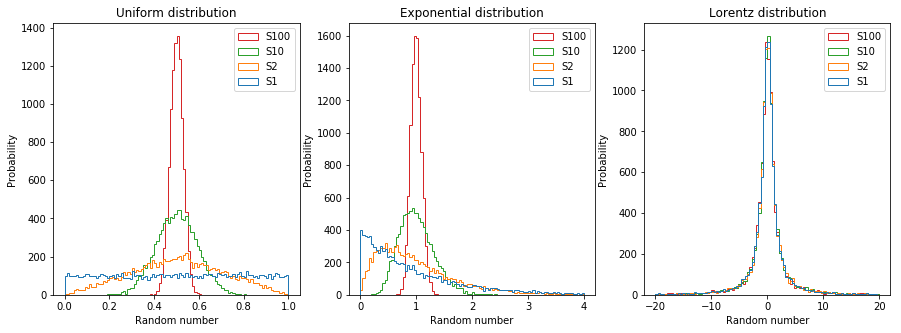

In [9]:
S1 = np.loadtxt("1.2/data/uniform_average_1.dat")
S2 = np.loadtxt("1.2/data/uniform_average_2.dat")
S10 = np.loadtxt("1.2/data/uniform_average_10.dat")
S100 = np.loadtxt("1.2/data/uniform_average_100.dat")

S1_exp = np.loadtxt("1.2/data/exponential_average_1.dat")
S2_exp = np.loadtxt("1.2/data/exponential_average_2.dat")
S10_exp = np.loadtxt("1.2/data/exponential_average_10.dat")
S100_exp = np.loadtxt("1.2/data/exponential_average_100.dat")

S1_lor = np.loadtxt("1.2/data/lorentz_average_1.dat")
S2_lor = np.loadtxt("1.2/data/lorentz_average_2.dat")
S10_lor = np.loadtxt("1.2/data/lorentz_average_10.dat")
S100_lor = np.loadtxt("1.2/data/lorentz_average_100.dat")


n_bins=100
plt.figure(figsize=(15,5))

# Uniform distribution
plt.subplot(131)
plt.hist([S1, S2, S10, S100], n_bins, \
         label=['S1', 'S2', 'S10', 'S100'], range=(0,1), histtype='step')
plt.title('Uniform distribution')
#plt.grid(True)
plt.legend ()
plt.xlabel('Random number')
plt.ylabel('Probability')

# Exponential distribution
plt.subplot(132)
plt.hist([S1_exp, S2_exp, S10_exp, S100_exp], n_bins,\
         label=['S1', 'S2', 'S10', 'S100'], range=(0,4), histtype='step')
plt.title('Exponential distribution')
#plt.grid(True)
plt.legend ()
plt.xlabel('Random number')
plt.ylabel('Probability')

#Cauchy-Lorentz distribution
plt.subplot(133)
plt.hist([S1_lor, S2_lor, S10_lor, S100_lor], n_bins,\
         label=['S1', 'S2', 'S10', 'S100'], range=(-20,20), histtype='step' )
plt.title('Lorentz distribution')
#plt.grid(True)
plt.legend ()
plt.xlabel('Random number')
plt.ylabel('Probability')


#plt.tight_layout()

plt.show()

Fit the N=100 case with a Gaussian function for uniform and exponential dice, and Cauchy-Lorentz distribution for the last one

In [10]:
from scipy.optimize import curve_fit

def gauss(x,a,b,c):  
    return a * np.exp(-b*(x-c)**2)
def cauchy_lorentz(x,a,b):
    return 1/np.pi * b/((x-a)**2 + b**2)

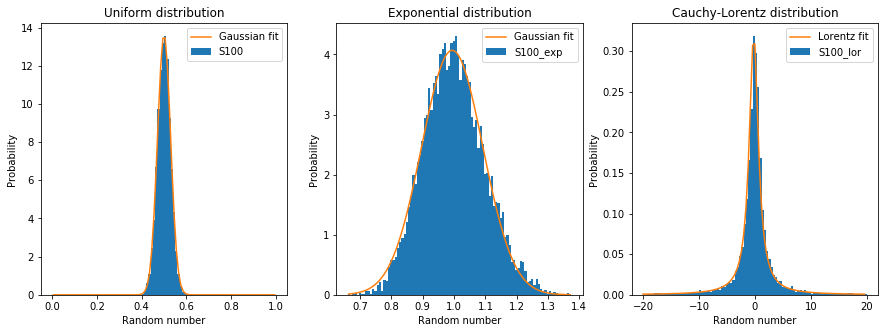

In [11]:
n_bins=100

plt.figure(figsize=(15,5))

# Uniform distribution
plt.subplot(131)
data, bins, patches = plt.hist(S100, bins=n_bins, density=True,label='S100', range=(0,1))
# Calculate x coordinates from histogram
bin_size = abs(bins[1] - bins[0])
x = np.linspace(start = bins[0]+0.5*bin_size, stop = bins[-2]+0.5*bin_size,num = n_bins, endpoint = True)

p_opt, p_cov = curve_fit(gauss,x,data)
y_fit = gauss(x,p_opt[0],p_opt[1], p_opt[2])

plt.plot(x,y_fit, label='Gaussian fit')
plt.title('Uniform distribution')
plt.xlabel('Random number')
plt.ylabel('Probability')
#plt.grid(True)
plt.legend ()


# Exponential distribution
plt.subplot(132)
data, bins, patches = plt.hist(S100_exp, bins=n_bins, density=True,\
                               label='S100_exp')

bin_size = abs( bins[1] - bins[0])
x=np.linspace(start=bins[0]+bin_size/2.0,stop=bins[-2]+bin_size/2.0,\
              num=n_bins,endpoint=True)

# Fitting histograms with gauss (proving CLT)
p_opt, p_cov = curve_fit(gauss,x,data)

y_fit = gauss(x,p_opt[0],p_opt[1], p_opt[2])
plt.plot(x,y_fit, label='Gaussian fit')
plt.title('Exponential distribution')
plt.xlabel('Random number')
plt.ylabel('Probability')
#plt.grid(True)
plt.legend ()


plt.subplot(133)
data, bins, patches = plt.hist(S100_lor, bins=n_bins, density=True,\
                               label='S100_lor', range=(-20,20))

# Calculate x coordinates from histogram
in_size = abs(bins[1]-bins[0])
x=np.linspace(start=bins[0]+bin_size/2.0,stop=bins[-2]+bin_size/2.0,\
              num=n_bins,endpoint=True)

# Fitting histograms with cauchy-lorentz
p_opt, p_cov = curve_fit(cauchy_lorentz,x,data)
y_fit = cauchy_lorentz(x,p_opt[0],p_opt[1])

plt.plot(x,y_fit, label='Lorentz fit')
plt.title('Cauchy-Lorentz distribution')
plt.xlabel('Random number')
plt.ylabel('Probability')
#plt.grid(True)
plt.legend ()

plt.show()


The figures show good compatibility between the data of the uniform and exponential dices with a Gaussian distribution, and with the Cauchy-Lorentz distribution for the Cauchy-Lorentz dice, accordingly to the Central Limit Theorem

### Exercise 01.3
- **Simulate** the Buffon’s experiment:  A needle of length $L$ is thrown at random onto a horizontal plane ruled with straight lines a distance $d$. The probability $P$ that the needle will intersect one of these lines is: $P = 2L/\pi d$. If the needle is thrown down $N_{thr}$ times and is observed to land on a line $N_{hit}$ of those times, we can make an estimate of $\pi$ from
$$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$$

- The parameter used are the following:
1. d = 1
2. L = 0.7
3. Blocks = 100
4. MC steps per block = 1000
5. Needle drops per MC step = 10000


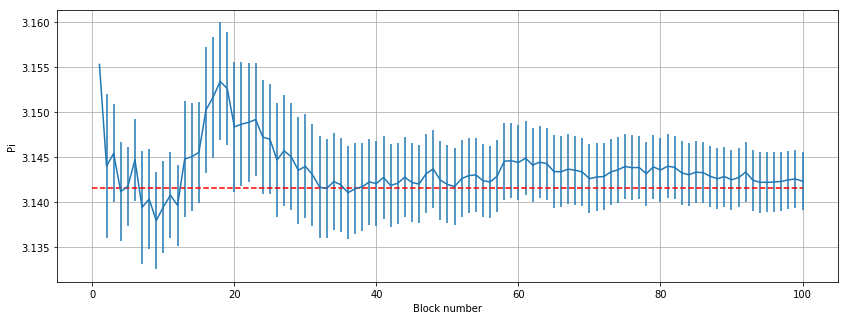

In [14]:
x3, y3, err3 = np.loadtxt("1.3/data/pi.out",usecols=(0,1,2), delimiter=' ', unpack='true')
plt.figure(figsize=(14,5))
plt.errorbar(x3, y3,yerr=err3)
plt.hlines(3.141592654, 0, 100, colors='r', linestyles='dashed')
plt.xlabel('Block number')
plt.ylabel('Pi')
plt.grid(True)
plt.show()



The estimate value for $\pi$ is $3.142 \pm 0.003 $, in accordance with the expected value